# Backdoor v2: Using `Re78` - `Re75`

Using linear regression to model using a backdoor estimator on `Re78` - `Re75` before and after job training.

In [1]:
import sys

In [2]:
# append parent directory to use utils
sys.path.append("../")

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils.bootstrap import bootstrap, bootstrap_experiment

from backdoor_utils import backdoor_param_a

In [4]:
lalonde_exp = pd.read_csv("../data/lalonde_exp.csv")
lalonde_obs = pd.read_csv("../data/lalonde_psid.csv")

In [5]:
lalonde_exp.shape, lalonde_obs.shape

((445, 13), (2675, 13))

In [6]:
lalonde_exp["re78_re75"] = lalonde_exp["re78"] - lalonde_exp["re75"]
lalonde_obs["re78_re75"] = lalonde_obs["re78"] - lalonde_obs["re75"]

## Using a's parameters

### Experimental Data

In [7]:
backdoor_result = backdoor_param_a(
    lalonde_exp,
    "treat",
    "re78_re75",
    ["age", "education", "black", "hispanic", "married", "re74"],
)
print(
    f"The difference between the treatment and no-treatment groups is {backdoor_result:.2f}."
)

The difference between the treatment and no-treatment groups is 1457.51.


In [8]:
backdoor_boostrap_results = bootstrap_experiment(
    df=lalonde_exp,
    function=backdoor_param_a,
    num_exp=10,
    n=50,
    ci=95,
    treatment_col="treat",
    outcome_col="re78_re75",
    confounder_cols=[
        "age",
        "education",
        "black",
        "hispanic",
        "married",
        "re74",
    ],
)

Running experiments: 100%|███████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.40it/s]


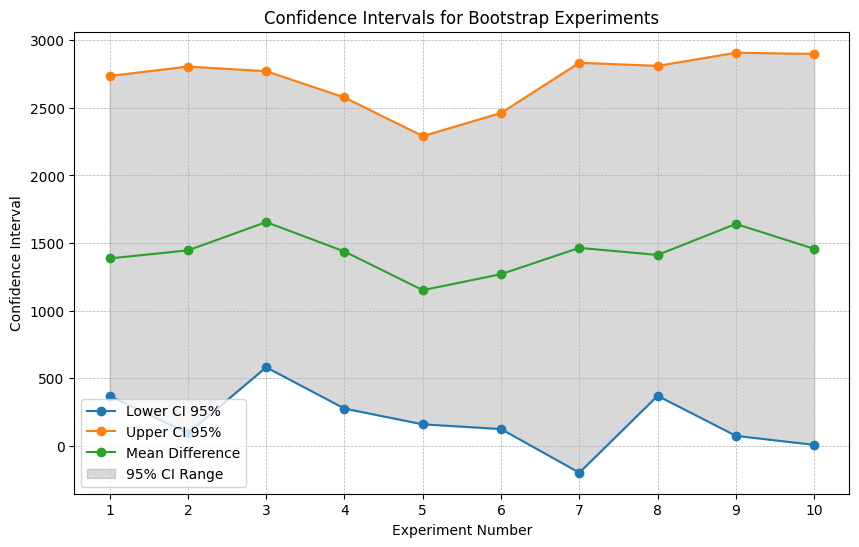

In [9]:
ci_df = pd.DataFrame(
    backdoor_boostrap_results, columns=["mean", "lower_ci", "upper_ci"]
)
ci_df["experiment"] = range(1, len(ci_df) + 1)

plt.figure(figsize=(10, 6))

plt.plot(ci_df["experiment"], ci_df["lower_ci"], label="Lower CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["upper_ci"], label="Upper CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["mean"], label="Mean Difference", marker="o")

plt.fill_between(
    ci_df["experiment"],
    ci_df["lower_ci"],
    ci_df["upper_ci"],
    color="gray",
    alpha=0.3,
    label="95% CI Range",
)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(ci_df["experiment"])
plt.xlabel("Experiment Number")
plt.ylabel("Confidence Interval")
plt.title("Confidence Intervals for Bootstrap Experiments")
plt.legend()
plt.show()

In [10]:
ci_df

,mean,lower_ci,upper_ci,experiment
0,1386.058092,367.755937,2736.575500,1
1,1445.639763,92.342423,2806.008090,2
2,1655.011853,580.386261,2771.932978,3
3,1437.201932,274.937870,2577.169077,4
4,1151.370704,158.343136,2291.473283,5
5,1269.511081,123.510197,2462.530745,6
6,1464.209066,-199.779467,2834.150266,7
7,1411.950555,369.345673,2811.019012,8
8,1641.303677,73.155787,2908.384559,9
9,1456.855490,6.457040,2899.568570,10


### Using Observational data

In [11]:
backdoor_result = backdoor_param_a(
    lalonde_obs,
    "treat",
    "re78_re75",
    ["age", "education", "black", "hispanic", "married", "re74"],
)
print(
    f"The difference between the treatment and no-treatment groups is {backdoor_result:.2f}."
)

The difference between the treatment and no-treatment groups is 1626.91.


In [12]:
backdoor_boostrap_results = bootstrap_experiment(
    df=lalonde_obs,
    function=backdoor_param_a,
    num_exp=10,
    n=50,
    ci=95,
    treatment_col="treat",
    outcome_col="re78_re75",
    confounder_cols=[
        "age",
        "education",
        "black",
        "hispanic",
        "married",
        "re74",
    ],
)

Running experiments: 100%|███████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.56it/s]


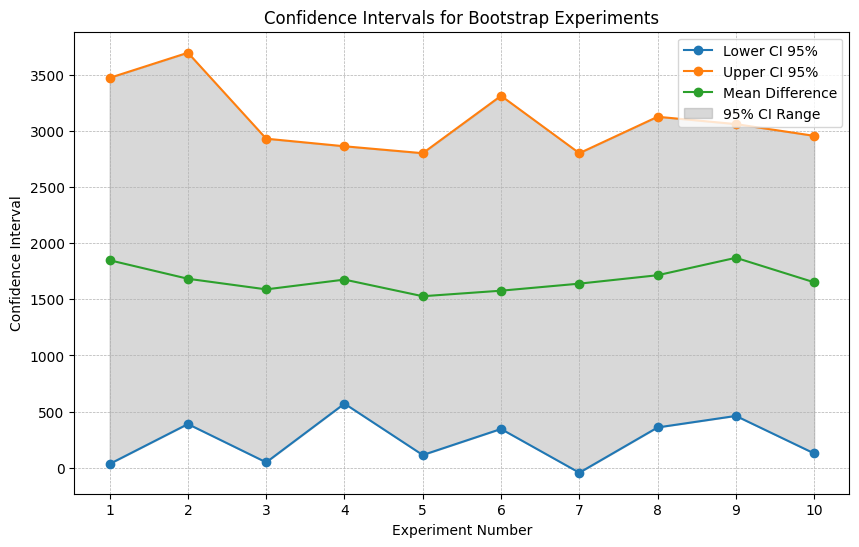

In [13]:
ci_df = pd.DataFrame(
    backdoor_boostrap_results, columns=["mean", "lower_ci", "upper_ci"]
)
ci_df["experiment"] = range(1, len(ci_df) + 1)

plt.figure(figsize=(10, 6))

plt.plot(ci_df["experiment"], ci_df["lower_ci"], label="Lower CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["upper_ci"], label="Upper CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["mean"], label="Mean Difference", marker="o")

plt.fill_between(
    ci_df["experiment"],
    ci_df["lower_ci"],
    ci_df["upper_ci"],
    color="gray",
    alpha=0.3,
    label="95% CI Range",
)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(ci_df["experiment"])
plt.xlabel("Experiment Number")
plt.ylabel("Confidence Interval")
plt.title("Confidence Intervals for Bootstrap Experiments")
plt.legend()
plt.show()

In [14]:
ci_df

,mean,lower_ci,upper_ci,experiment
0,1847.260702,34.419849,3470.196492,1
1,1682.457917,389.507910,3693.946971,2
2,1588.096974,48.767460,2929.007806,3
3,1675.025590,571.243575,2861.392500,4
4,1527.020196,113.813905,2799.790365,5
5,1576.316593,345.800924,3310.771518,6
6,1639.042009,-43.544410,2800.029911,7
7,1713.914291,359.354669,3124.008057,8
8,1869.127183,461.961600,3058.733648,9
9,1650.920794,128.081092,2954.247857,10
